In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q8p_2v3e because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
!ls

 Clustering_POS_WordVectors.ipynb
 Exploring_PartsOfSpeech.ipynb
'Genshin Impact Events Calendar.xlsx'
 Gotcha_Gaming_EmotionVectors.ipynb
 Gotcha_Gaming_Sentiment_LDA.ipynb
 ReviewTextAnalysis.ipynb
'ST_Emotions Vocab_Building.ipynb'
'Sensor Tower Data-20220405T232726Z-001.zip'
 SensorTowerData
 Top35Reviews_create_dfs.ipynb
 Top35Reviews_initial_Exploration.ipynb
 Top35Reviews_sentiment_threaded.ipynb
 Top_Reviews_Download_Save.ipynb
 Untitled.ipynb
 __pycache__
 bart-large-cnn
 commonFunctions.py
 emotions_dictionary.plk
 game_emotions_vector_df.pkl
 game_emotions_vector_df_reviews.pkl
 sentReviews
 survey_text_st.ipynb
 tweeteval_new


In [4]:
game_emotions = pd.read_pickle('game_emotions_vector_df.pkl', compression='gzip')
game_emotions

,title,sentiment_analysis,accept,admir,ador,affect,afraid,agit,agoni,aggress,...,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath,reviews_count
0,AFK Arena,negative,1,0,0,3,0,0,0,1,...,0,0,4,0,2,0,0,0,0,610
1,AFK Arena,neutral,0,1,0,1,0,0,0,0,...,1,0,2,0,0,0,1,0,0,445
2,AFK Arena,positive,0,9,2,0,0,0,0,1,...,0,0,14,0,2,0,4,0,0,3400
3,ANOTHER EDEN Global,negative,7,5,0,9,1,0,6,1,...,0,1,44,0,10,0,7,1,0,3029
4,ANOTHER EDEN Global,neutral,2,4,0,2,0,0,1,0,...,0,0,4,0,3,0,0,0,0,1208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Yu-Gi-Oh! Duel Links,neutral,11,26,3,46,4,1,7,0,...,2,3,115,1,18,0,7,5,2,17793
104,Yu-Gi-Oh! Duel Links,positive,25,202,36,249,6,0,11,5,...,3,5,1379,0,61,0,76,33,2,81894
105,Yu-Gi-Oh! Master Duel,negative,12,6,0,11,1,0,8,0,...,0,0,33,0,9,0,1,3,0,2455
106,Yu-Gi-Oh! Master Duel,neutral,1,1,0,1,1,0,0,0,...,0,0,10,0,2,0,1,0,0,817


In [77]:
columns = game_emotions.columns[2:-1]
top_emotions = game_emotions[columns].sum()
display(top_emotions.sort_values(ascending=False)[0:25])
top_emotions = top_emotions.sort_values(ascending=False)[3:22]

love          253664
like          203445
enjoy         118657
amaz           88656
pleas          79308
ecstasi        58726
thank          42229
hope           38448
long           34702
comfort        34103
content        25491
depress        23965
baffl          22579
bore           21999
interest       19537
annoy          15687
dread          13703
hate           13358
expect         12912
stuck          12806
care           12657
disappoint     12499
disturb        11938
happi          11335
impati         11074
dtype: int64

In [78]:
top_emotions = top_emotions[3:23]

In [79]:
top_emotions

thank         42229
hope          38448
long          34702
comfort       34103
content       25491
depress       23965
baffl         22579
bore          21999
interest      19537
annoy         15687
dread         13703
hate          13358
expect        12912
stuck         12806
care          12657
disappoint    12499
dtype: int64

Game Top Emotions


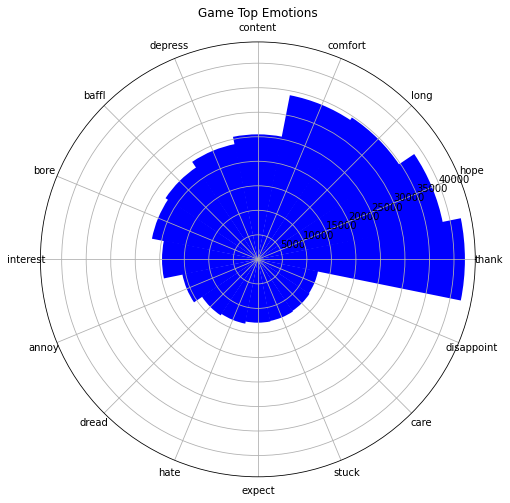

In [72]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def CreateChart(df, title):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,polar=True)

    N = len(df) 

    theta = np.arange(0, 2*np.pi, 2*np.pi/N) 
    bars = ax.bar(theta, df, width=0.4, color='blue')
    print(title)
    if('negative' in title):
        bars = ax.bar(theta, df, width=0.4, color='red')

        

    ax.set_title(title)
    ax.set_xticks(theta)
    ax.set_xticklabels(df.index.tolist())
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    return plt.show()

CreateChart(top_emotions, 'Game Top Emotions')

In [73]:
pos_neg_emotions = game_emotions[game_emotions['sentiment_analysis'].isin(['positive','negative'])]
pos_neg_emotions

,title,sentiment_analysis,accept,admir,ador,affect,afraid,agit,agoni,aggress,...,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath,reviews_count
0,AFK Arena,negative,1,0,0,3,0,0,0,1,...,0,0,4,0,2,0,0,0,0,610
2,AFK Arena,positive,0,9,2,0,0,0,0,1,...,0,0,14,0,2,0,4,0,0,3400
3,ANOTHER EDEN Global,negative,7,5,0,9,1,0,6,1,...,0,1,44,0,10,0,7,1,0,3029
5,ANOTHER EDEN Global,positive,8,67,35,85,2,0,6,8,...,0,1,45,1,15,0,29,28,0,15279
6,Arknights,negative,11,8,1,15,1,0,13,3,...,1,4,64,0,18,0,4,3,0,3812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,The Seven Deadly Sins,positive,11,119,20,57,3,0,4,4,...,0,0,809,0,20,0,29,10,2,20558
102,Yu-Gi-Oh! Duel Links,negative,47,36,1,88,12,1,47,4,...,1,3,131,3,110,0,17,9,1,27547
104,Yu-Gi-Oh! Duel Links,positive,25,202,36,249,6,0,11,5,...,3,5,1379,0,61,0,76,33,2,81894
105,Yu-Gi-Oh! Master Duel,negative,12,6,0,11,1,0,8,0,...,0,0,33,0,9,0,1,3,0,2455


Genshin Impact (positive) emotions


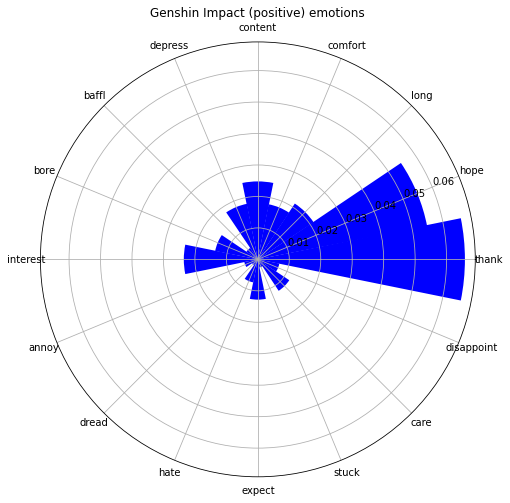

Genshin Impact (negative) emotions


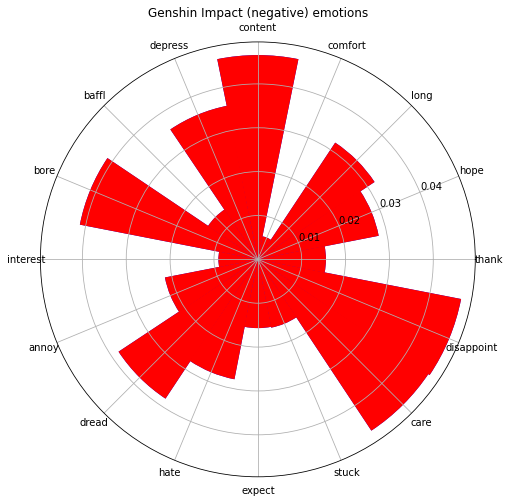

In [74]:
for game in ['Genshin Impact']:# pos_neg_emotions['title'].unique():
    for sentiment in ['positive','negative']:
        temp_df = pos_neg_emotions[pos_neg_emotions.columns]
        temp_df = temp_df[temp_df['title']== game]
        temp_df = temp_df[temp_df['sentiment_analysis']==sentiment]
        
        totalCount = temp_df['reviews_count'].values[0]
#         display(totalCount)
#         display(temp_df)
        # pick the columns for the emotions we want to see
        temp_df = temp_df[top_emotions.index]
        temp_df = temp_df.sum()
        temp_df = temp_df.div(int(totalCount))
        CreateChart(temp_df, f"{game} ({sentiment}) emotions")
#         break
#     break
        

All Games (positive) emotions


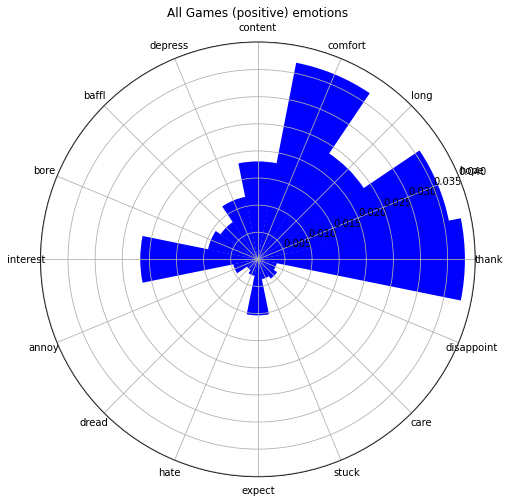

All Games (negative) emotions


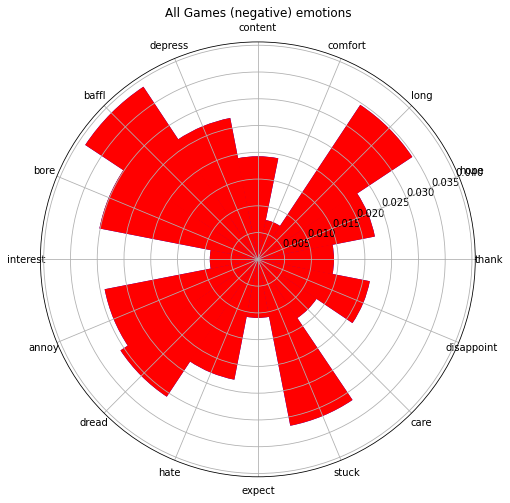

In [75]:

for sentiment in ['positive','negative']:
    temp_df = pos_neg_emotions[pos_neg_emotions.columns]
    temp_df = temp_df[temp_df['sentiment_analysis']==sentiment]

    totalCount = temp_df['reviews_count'].values
#     print(len(totalCount))
#     display(totalCount)
#         display(temp_df)
    # pick the columns for the emotions we want to see
    temp_df = temp_df[top_emotions.index]
#     print(len(temp_df))
#     display(temp_df)
    temp_df = temp_df.div(totalCount,axis=0)
#     display(temp_df)
    temp_df = temp_df.mean()
#     temp_df = temp_df.div(totalCount)
    CreateChart(temp_df, f"All Games ({sentiment}) emotions")
#         break

Fate/Grand Order (English) (positive) emotions


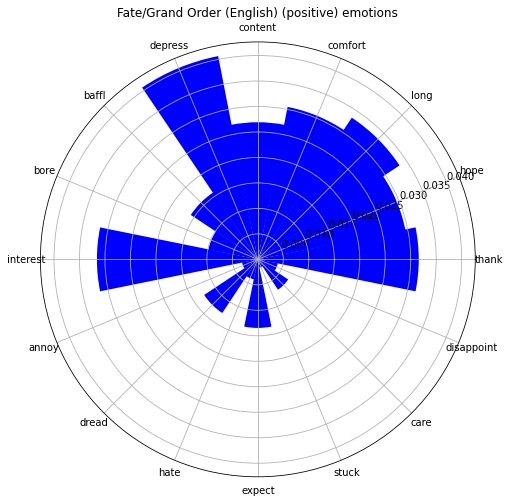

Fate/Grand Order (English) (negative) emotions


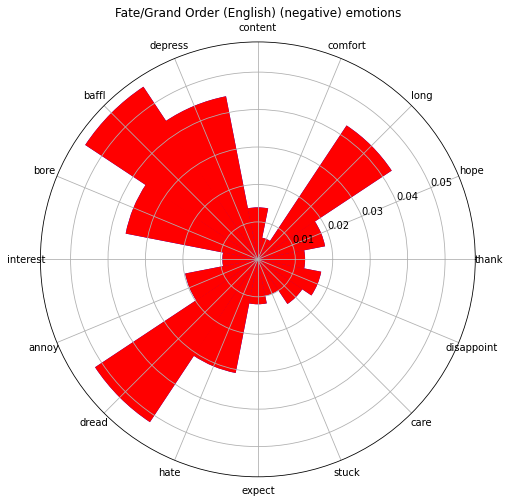

In [82]:
# for elem in game_emotions['title']:
#     print(elem)
for game in ['Fate/Grand Order (English)']:# pos_neg_emotions['title'].unique():
    for sentiment in ['positive','negative']:
        temp_df = pos_neg_emotions[pos_neg_emotions.columns]
        temp_df = temp_df[temp_df['title']== game]
        temp_df = temp_df[temp_df['sentiment_analysis']==sentiment]
        
        totalCount = temp_df['reviews_count'].values[0]
#         display(totalCount)
#         display(temp_df)
        # pick the columns for the emotions we want to see
        temp_df = temp_df[top_emotions.index]
        temp_df = temp_df.sum()
        temp_df = temp_df.div(int(totalCount))
        CreateChart(temp_df, f"{game} ({sentiment}) emotions")
#         break
#     break
        